### What is data cleaning?
Data cleaning is a very important and time consuming process of preparing data before proper analysis. Data scientists spend lots of time on this level of data exploring, which sometimes requires also some kind of domain knowledge.

Often, data that we get (especially) from different sources is inconsistent, dirty or missing. We need to make decision how to deal with such problems preserving as much valuable information as we can. 

Data that we will analyze came from travel company, which offers trips from London to New Zealand and Australia.
We got two tables: 
- **traveler** (users)
- **travel** (travels records)

In [2]:
import pandas as pd

In [3]:
# preparing data 
traveler = pd.DataFrame({'user_id': [136, 284, 101, 529, 800, 823], 'age': [None, 38, 30, 43, 49, 28], 'name': ["Ann", "Ben", "Tom", "Bianca", "Caroline", "Kate"]})
travel = pd.DataFrame({'user_id': [101, 284, 136, 800, 101, 800, 823, 529, 284], 'date_of_journey': ['2018-01-16', '2017-07-13','2019-10-10','2018/03/20', '2019-12-24', '2017-10-17','2016/11/02','2019/09/14', '2019-08-07'],'duration': [10, 10,7,13,7,11,14, 8, 12],'destination': ["New Zeland", "australia", "Australia", "New_Zealand", "Australia/","Australia", "New Zealand", "Australia", "New_zealand"], 'cost': [None, 2325.0, 1760.0, 2740.0, 4000.0, 2475.0, 3140.0, 1840.0, 2910.0], 'currency': [None, 'EUR', 'GBP', 'GBP', 'GBP','EUR', 'GBP', 'GBP', 'GBP']})

traveler.to_csv("traveler.csv", index=False)
travel.to_csv("travel.csv", index=False)

## 1. Merging data from two csv files.

In [4]:
traveler = pd.read_csv("traveler.csv")
travel = pd.read_csv("travel.csv")

data = pd.merge(travel, traveler, on='user_id')
data

,user_id,date_of_journey,duration,destination,cost,currency,age,name
0,101,2018-01-16,10,New Zeland,NaN,NaN,30.0,Tom
1,101,2019-12-24,7,Australia/,4000.0,GBP,30.0,Tom
2,284,2017-07-13,10,australia,2325.0,EUR,38.0,Ben
3,284,2019-08-07,12,New_zealand,2910.0,GBP,38.0,Ben
4,136,2019-10-10,7,Australia,1760.0,GBP,NaN,Ann
5,800,2018/03/20,13,New_Zealand,2740.0,GBP,49.0,Caroline
6,800,2017-10-17,11,Australia,2475.0,EUR,49.0,Caroline
7,823,2016/11/02,14,New Zealand,3140.0,GBP,28.0,Kate
8,529,2019/09/14,8,Australia,1840.0,GBP,43.0,Bianca


## 2. Making data consistent

### 2a. Date
For making for example some visualizations of data in time, we need to transform it to have same format within the column. In our case we have a few date formats in one column so we need to use `infer_datetime_format` and let pandas try to infer what the proper format should be. But we should remember that if someone was too creative it probably will not work properly. 

In [5]:
data.date_of_journey = pd.to_datetime(data.date_of_journey, infer_datetime_format=True)
data

,user_id,date_of_journey,duration,destination,cost,currency,age,name
0,101,2018-01-16,10,New Zeland,NaN,NaN,30.0,Tom
1,101,2019-12-24,7,Australia/,4000.0,GBP,30.0,Tom
2,284,2017-07-13,10,australia,2325.0,EUR,38.0,Ben
3,284,2019-08-07,12,New_zealand,2910.0,GBP,38.0,Ben
4,136,2019-10-10,7,Australia,1760.0,GBP,NaN,Ann
5,800,2018-03-20,13,New_Zealand,2740.0,GBP,49.0,Caroline
6,800,2017-10-17,11,Australia,2475.0,EUR,49.0,Caroline
7,823,2016-11-02,14,New Zealand,3140.0,GBP,28.0,Kate
8,529,2019-09-14,8,Australia,1840.0,GBP,43.0,Bianca


### 2b. Cost
When we analyse two columns cost and currency we can easily notice that costs are given in two currencies. We want our data to be consistent, so we will change cost values to GBP, using pandas slicing. First of all, we will choose only cells with cost value where currency is 'EUR' and update this cells. In the second step we will change all "EUR" to "GBP" in currency column.

In [6]:
data.loc[data.currency == 'EUR', ['cost']] = data.cost*0.8
data.currency.replace("EUR", "GBP", inplace=True)
data

,user_id,date_of_journey,duration,destination,cost,currency,age,name
0,101,2018-01-16,10,New Zeland,NaN,NaN,30.0,Tom
1,101,2019-12-24,7,Australia/,4000.0,GBP,30.0,Tom
2,284,2017-07-13,10,australia,1860.0,GBP,38.0,Ben
3,284,2019-08-07,12,New_zealand,2910.0,GBP,38.0,Ben
4,136,2019-10-10,7,Australia,1760.0,GBP,NaN,Ann
5,800,2018-03-20,13,New_Zealand,2740.0,GBP,49.0,Caroline
6,800,2017-10-17,11,Australia,1980.0,GBP,49.0,Caroline
7,823,2016-11-02,14,New Zealand,3140.0,GBP,28.0,Kate
8,529,2019-09-14,8,Australia,1840.0,GBP,43.0,Bianca


### 2c. Destination
As we can see below in destination column we expected two values, but there have more unique values (we can see that below), we will try to fix that. Changing every string respectively to `new_zealand` or to `australia`. In the second cell we have all categories that occur in destination column.  

In [7]:
data.destination.describe()

count             9
unique            7
top       Australia
freq              3
Name: destination, dtype: object

In [8]:
# We need to get all compromised categories and try to unify them
categories = data.destination.drop_duplicates()
print(categories)

0     New Zeland
1     Australia/
2      australia
3    New_zealand
4      Australia
5    New_Zealand
7    New Zealand
Name: destination, dtype: object


In [9]:
data.destination.loc[data.destination.str.lower().str.startswith('n', na=False)] = "new_zealand"
data.destination.loc[data.destination.str.lower().str.startswith('a', na=False)] = "australia"
data

/Users/ewelina/.pyenv/versions/3.6.8/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,user_id,date_of_journey,duration,destination,cost,currency,age,name
0,101,2018-01-16,10,new_zealand,NaN,NaN,30.0,Tom
1,101,2019-12-24,7,australia,4000.0,GBP,30.0,Tom
2,284,2017-07-13,10,australia,1860.0,GBP,38.0,Ben
3,284,2019-08-07,12,new_zealand,2910.0,GBP,38.0,Ben
4,136,2019-10-10,7,australia,1760.0,GBP,NaN,Ann
5,800,2018-03-20,13,new_zealand,2740.0,GBP,49.0,Caroline
6,800,2017-10-17,11,australia,1980.0,GBP,49.0,Caroline
7,823,2016-11-02,14,new_zealand,3140.0,GBP,28.0,Kate
8,529,2019-09-14,8,australia,1840.0,GBP,43.0,Bianca


## 3. Deleting columns
If there are columns that suppose to be dismissed we can drop them. Here we will drop `currency` since it is the same for all records, we will also delete `name` column because we will not use this information.

In [10]:
data = data.drop(['currency', 'name'], axis=1)
data

,user_id,date_of_journey,duration,destination,cost,age
0,101,2018-01-16,10,new_zealand,NaN,30.0
1,101,2019-12-24,7,australia,4000.0,30.0
2,284,2017-07-13,10,australia,1860.0,38.0
3,284,2019-08-07,12,new_zealand,2910.0,38.0
4,136,2019-10-10,7,australia,1760.0,NaN
5,800,2018-03-20,13,new_zealand,2740.0,49.0
6,800,2017-10-17,11,australia,1980.0,49.0
7,823,2016-11-02,14,new_zealand,3140.0,28.0
8,529,2019-09-14,8,australia,1840.0,43.0


## 4. Missing values
In first cell we can check if there are any missing values `data.isna()`. 

Having missing values we can do one of two things:
1. we can delete rows in which data is not complete and we can't figure out how to fill that missing values in a way it will be not misleading.
`data.dropna()`
2. if we have knowledge to fill missing values we should defnitely do it to preserve as much information/rows as we can. There are lots of strategies to do it properly, but definitely we need to have some domain knowledge too. For example in column where are only positive values we can fill empty values with (-1) to highlight that it is different than the others. Different solution is using some arbitrary chosen value or calculated values like: mean, max, min value.  

In our situation we will fill missing values with:
- `cost` with mean travel costs for 'new_zeland'  
- `age` with mean value calculated from age column  
**values:** {'cost': 2930.0, 'age': 38.0}

In [11]:
data.isna()

,user_id,date_of_journey,duration,destination,cost,age
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False


In [12]:
values = {'cost': data.cost.where(data.destination=='new_zealand').mean(), 'age': round(data.age.mean())}
print('values:',values)
data = data.fillna(value=values, limit=1)
data

values: {'cost': 2930.0, 'age': 38.0}


,user_id,date_of_journey,duration,destination,cost,age
0,101,2018-01-16,10,new_zealand,2930.0,30.0
1,101,2019-12-24,7,australia,4000.0,30.0
2,284,2017-07-13,10,australia,1860.0,38.0
3,284,2019-08-07,12,new_zealand,2910.0,38.0
4,136,2019-10-10,7,australia,1760.0,38.0
5,800,2018-03-20,13,new_zealand,2740.0,49.0
6,800,2017-10-17,11,australia,1980.0,49.0
7,823,2016-11-02,14,new_zealand,3140.0,28.0
8,529,2019-09-14,8,australia,1840.0,43.0


## 5. Maping values
No we would like to map destination column values to `{'new_zealand': 0, 'australia': 1}` which is more readible for machine than strings.

In [13]:
data.destination.replace(('new_zealand', 'australia'), (0,1), inplace=True)
data

,user_id,date_of_journey,duration,destination,cost,age
0,101,2018-01-16,10,0,2930.0,30.0
1,101,2019-12-24,7,1,4000.0,30.0
2,284,2017-07-13,10,1,1860.0,38.0
3,284,2019-08-07,12,0,2910.0,38.0
4,136,2019-10-10,7,1,1760.0,38.0
5,800,2018-03-20,13,0,2740.0,49.0
6,800,2017-10-17,11,1,1980.0,49.0
7,823,2016-11-02,14,0,3140.0,28.0
8,529,2019-09-14,8,1,1840.0,43.0


##  6. Outliers
Outliers are observations that are significantly different that the other observations, sometimes are called abnormal observations or anomalies. The easiest way to notice outliers is preparing plots. Here we will use scatter plot and boxplot. 

**Scatterplot:** https://en.wikipedia.org/wiki/Scatter_plot

**Boxplot:** https://en.wikipedia.org/wiki/Box_plot

On both of the plots we can notice that one observation is much different than the other (marked with red).
Having some business knowledge we can decide if such observation is an error or maybe we can explain it somehow and it is valuable for us. For example, while analyzing some health data, outliers can bring some important information about anomalies that can be caused by disease. In our situation let's say that this anomaly is caused by dates when user was traveling (Christmas to New Years Eve) and probably it was a very expensive trip. 
We decided that we would like to delete it, because such situation is abnormal and can be misleading.

To detect outliers we can also use clustering, analyse standard deviation and many others. 

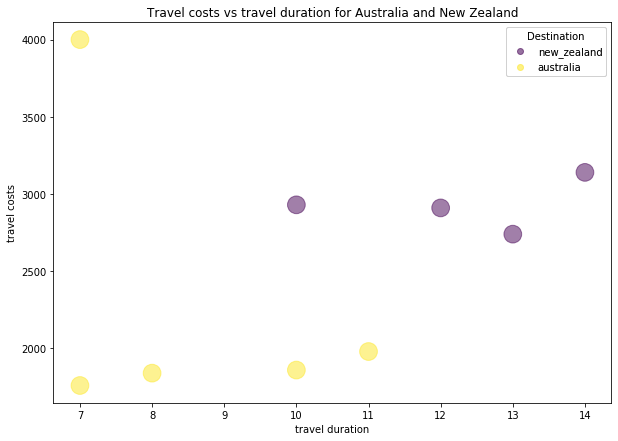

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rcParams['figure.figsize'] = [10, 7]

x = data.duration
y = data.cost
z = data.destination

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=z, s=np.pi*100, marker='o',  alpha=0.5)
# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc=1, title="Destination")
ax.add_artist(legend)
legend.get_texts()[0].set_text('new_zealand')
legend.get_texts()[1].set_text('australia')

plt.title('Travel costs vs travel duration for Australia and New Zealand')
plt.xlabel('travel duration')
plt.ylabel('travel costs')
plt.show()
# plt.savefig('outlier.png')

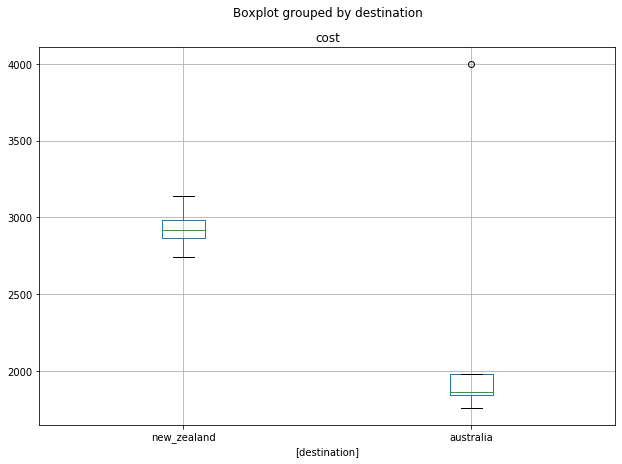

In [630]:
boxplot = data.boxplot(column=['cost'], by=['destination'])
plt.xticks([1, 2], ['new_zealand', 'australia']);
# plt.savefig('boxplot.png')

In [631]:
data = data.drop(data.index[data.cost == data.cost.max()], axis=0)
data

,user_id,date_of_journey,duration,destination,cost,age
0,101,2018-01-16,10,0,2930.0,30.0
2,284,2017-07-13,10,1,1860.0,38.0
3,284,2019-08-07,12,0,2910.0,38.0
4,136,2019-10-10,7,1,1760.0,38.0
5,800,2018-03-20,13,0,2740.0,49.0
6,800,2017-10-17,11,1,1980.0,49.0
7,823,2016-11-02,14,0,3140.0,28.0
8,529,2019-09-14,8,1,1840.0,43.0


## 7. Scaling
Sometimes scaling data can be useful or necessary, because many analytics methods are sensitive to scale of data. But what does it mean? Scaling is changing the range of features. For example, we would like to transform data to fit the specific range like `[0-1]`.

There are few scaling methods, but here we will use **Min-Max** algorithm, which uses min and max value for calculation.

We will try to scale `cost` column.

**CONCLUSION:**
on the scatterplots below we can see that points are in the same locations, but values are changed. 

In [632]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(data[['cost']])
print('Scaled cost value: \n', scaler.transform(data[['cost']]))

Scaled cost value: 
 [[0.84782609]
 [0.07246377]
 [0.83333333]
 [0.        ]
 [0.71014493]
 [0.15942029]
 [1.        ]
 [0.05797101]]


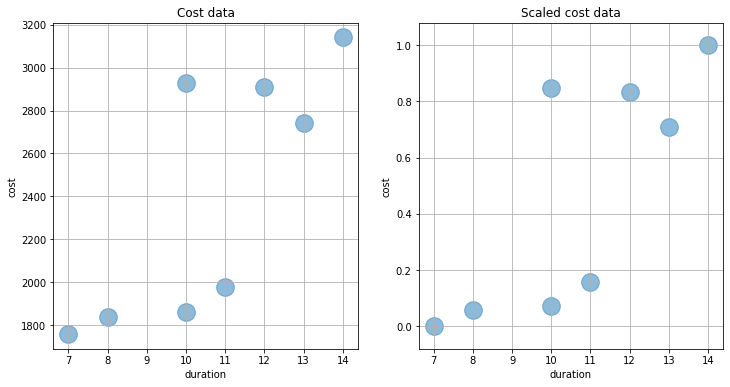

In [633]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
plt.scatter(data.duration, data.cost, s=np.pi*100, marker='o',  alpha=0.5)
plt.title('Cost data')
plt.xlabel('duration', multialignment='center')
plt.ylabel('cost', multialignment='center')
plt.grid(True)

plt.subplot(122)
plt.scatter(data.duration, scaler.transform(data[['cost']]), s=np.pi*100, marker='o',  alpha=0.5)
plt.title('Scaled cost data')
plt.xlabel('duration', multialignment='center')
plt.ylabel('cost', multialignment='center')
plt.grid(True)

plt.show()

## ** Normalization
We should remember that scaling is something different that normalization, but sometimes this terms are confounded. Normalization is more radical process, which suppose to change the shape of data distribution to `bell curve` (normal distribution).
https://en.wikipedia.org/wiki/Normalization_(statistics)